### In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.
#### Hint:
- import numpy as np
- import matplotlib.pyplot as plt
- from mpl_toolkits.mplot3d import Axes3D
- from sklearn import decomposition
- from sklearn import datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Using 'mplot3d' module from 'mpl_toolkits' matplotlib toolkit to import 'Axes3D'.
from mpl_toolkits.mplot3d import Axes3D

# Importing 'decomposition' module from 'sklearn'.
from sklearn import decomposition
from sklearn import datasets

In [2]:
# NOTE: Changed in version 1.0.0: Prior to Matplotlib 1.0.0, Axes3D needed to be directly instantiated with 
# from mpl_toolkits.mplot3d import Axes3D; 
# ax = Axes3D(fig).

# Changed in version 3.2.0: Prior to Matplotlib 3.2.0, it was necessary to explicitly import the 
# mpl_toolkits.mplot3d module to make the '3d' projection to Figure.add_subplot.

# Creating 3D Axes (of class Axes3D) by passing the projection="3d" keyword argument to Figure.add_subplot.
# import matplotlib.pyplot as plt
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

import matplotlib
matplotlib.__version__

'3.1.3'

In [3]:
# Loading data using sklearn
iris = datasets.load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

In [4]:
# PCA is used to decompose a multivariate dataset in a set of successive orthogonal components 
# that explains a maximum amount of the variance.
# It is a process of converting a data set having vast dimensions into a data set with lesser dimensions.
pca = decomposition.PCA(n_components=3)

In [5]:
# Fitting the model with 'data'(the passed array-like data) and applying the dimensionality reduction
# on 'data'(the passed array-like data).
data = pca.fit_transform(data)
# data

In [6]:
# Creating the respective labels name
df = pd.Categorical(target)
df

[0, 0, 0, 0, 0, ..., 2, 2, 2, 2, 2]
Length: 150
Categories (3, int64): [0, 1, 2]

In [7]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

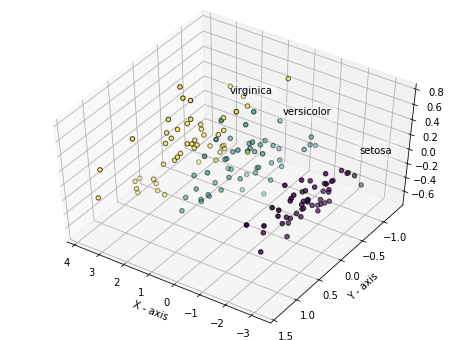

In [10]:
# Creating 3D Axes (of class Axes3D) and plotting.
"""fig = plt.figure(1, figsize=(6.5, 5))

ax = Axes3D(fig, elev=48, azim=124)"""

fig = plt.figure(num=1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=49, azim=124)

# Naming the respective labels
for i in np.arange(3):
    #print(data[target == i, i])
    text3d = ax.text3D(data[target == i, 0].mean() - 2, 
                       data[target == i, 1].mean() - 0.2, 
                       data[target == i, 2].mean() + 0.8, 
                       target_names[i], 
                       horizontalalignment='center')
    text3d.set_bbox(dict(alpha=0.3, facecolor='w', edgecolor='w'))

# Plotting the graph
ax.scatter3D(xs=data[:,0], ys=data[:,1], zs=data[:,2], c=df, edgecolor='k')
ax.set_xlabel('X - axis')
ax.set_ylabel('Y - axis')
plt.show()